In [127]:
import os
from pathlib import Path

import netCDF4 as nc
import xarray as xr

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# About
__Date__: 02/28/25  
__Author__: Pat McCornack  
__Purpose__: Analyze trends in coastal low clouds (CLC) using the GOES CLC dataset provided by Rachel Clemesha for Santa Cruz Island.

# Functions

# Read in Data

In [128]:
root_dir = Path().resolve().parents[1]
goes_fpath = root_dir / 'data' / '01-raw' / 'geospatial' / 'goes-west-clc' / 'cldalb-sci.nc'

clc_da = xr.open_dataarray(goes_fpath)

# Whole Area Analysis 

## Cloud Frequency

In [ ]:
# !!!!! NEEDS FIX - NOT WORKING AS EXPECTED
clc_da_binary = clc_da.where(clc_da >= 8.5, 1, 0)

### Interannual Plot

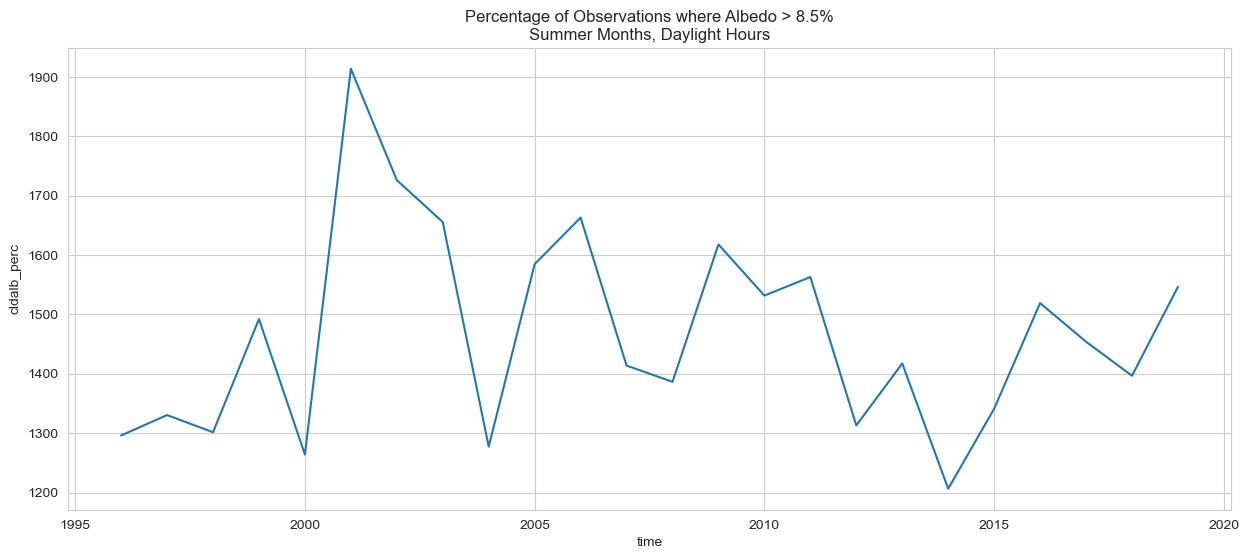

In [131]:
# Group data by area
da_gp = clc_da_binary.groupby('time').sum(dim=['lat', 'lon'])
df = da_gp.to_dataframe()
df.index = pd.to_datetime(df.index).ceil('30min')
df = df.reset_index()

# Group data by time
df_gp = df.groupby(df['time'].dt.year).sum('cldalb')
df_gp = df_gp.reset_index()

# Convert values to percentage of total observations per year
obs_count_year = clc_da_binary.sel(time=clc_da_binary.time.dt.year == 2008).count()
total_obs = clc_da_binary['time'].shape[0]
df_gp['cldalb_perc'] = df_gp['cldalb'] / int(obs_count_year) * 100


# Plot
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(df_gp,
             x='time',
             y='cldalb_perc')
ax.set(title='Percentage of Observations where Albedo > 8.5%\nSummer Months, Daylight Hours')
plt.show()



### Interannual Plot by Month

Max Cloud Frequency: 44228424.0 on 5 2006


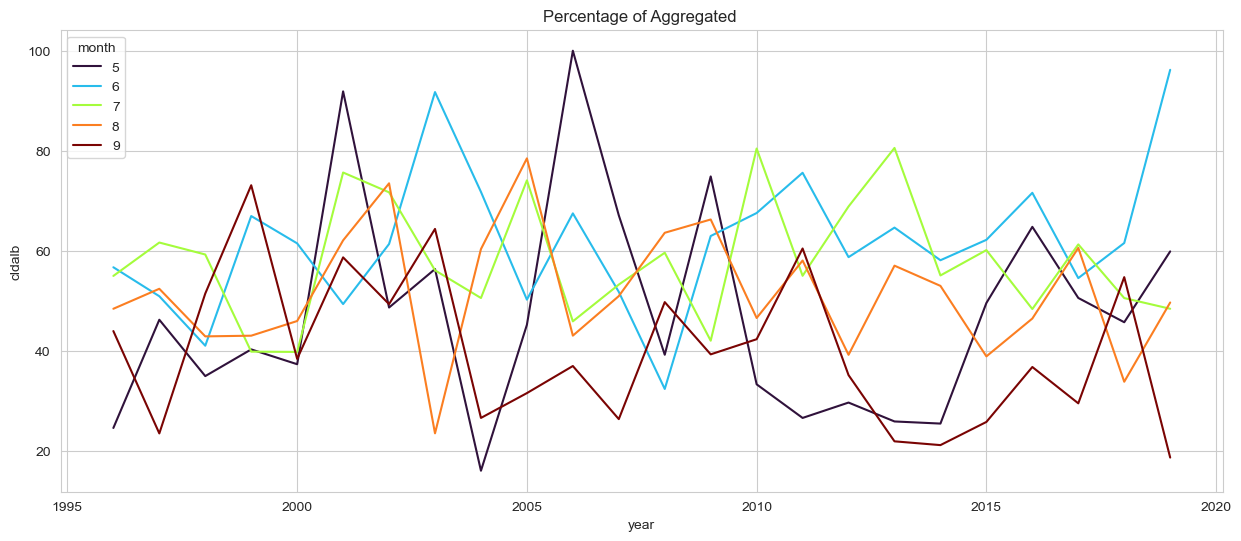

In [ ]:
# Group data by area
da_gp = clc_da_binary.groupby('time').sum(dim=['lat', 'lon'])
df = da_gp.to_dataframe()
df.index = pd.to_datetime(df.index).ceil('30min')
df = df.reset_index()

# Group data by time
df_gp = df.groupby([df['time'].dt.year, df['time'].dt.month]).sum('cldalb')


df_gp['year'] = df_gp.index.get_level_values(0)
df_gp['month'] = df_gp.index.get_level_values(1)
df_gp = df_gp.reset_index(drop=True)

# Convert values to percentage of max
max_row = df_gp.loc[df_gp['cldalb'] == df_gp['cldalb'].max()]
df_gp['cldalb'] = df_gp['cldalb'] / max_row['cldalb'].values[0] * 100

print(f"Max Cloud Frequency: {max_row['cldalb'].values[0]} on {max_row['month'].values[0]} {max_row['year'].values[0]}")

# Plot
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(df_gp,
             x='year',
             y='cldalb',
             hue='month',
             palette='turbo')
ax.set(title='Percentage of Aggregated ')
plt.show()



## Albedo

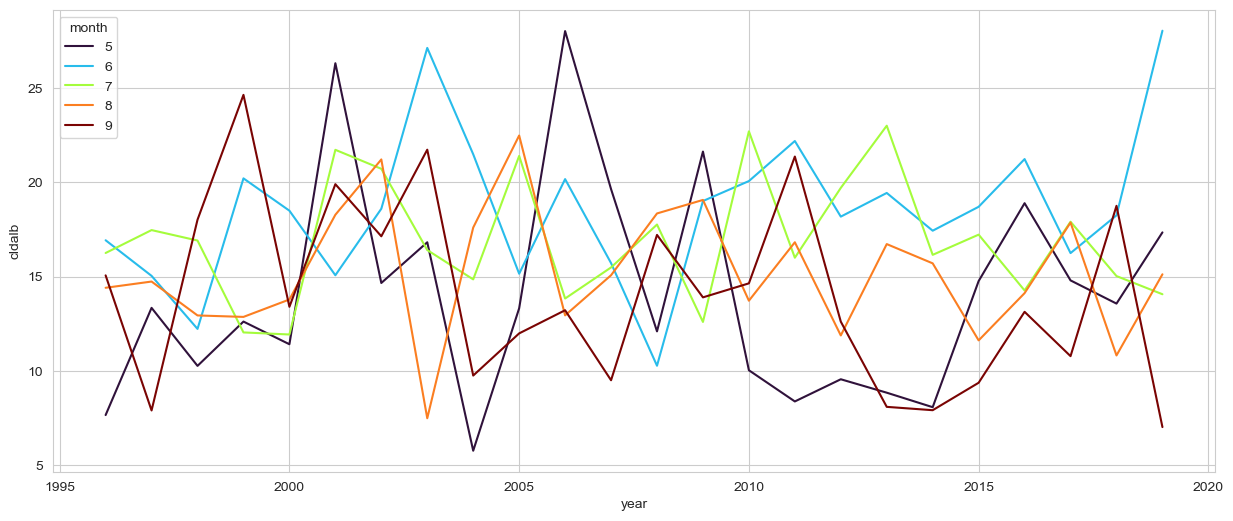

In [124]:
# Group data by area
da_gp = clc_da.groupby('time').mean(dim=['lat', 'lon'])
df = da_gp.to_dataframe()
df.index = pd.to_datetime(df.index).ceil('30min')
df = df.reset_index()


# Group data by time
df_gp = df.groupby([df['time'].dt.year, df['time'].dt.month]).mean('cldalb')

df_gp['year'] = df_gp.index.get_level_values(0)
df_gp['month'] = df_gp.index.get_level_values(1)

df_gp = df_gp.reset_index(drop=True)

# Plot
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(df_gp,
             x='year',
             y='cldalb',
             hue='month',
             palette='turbo')
plt.show()


In [125]:
df_gp['year'] = df_gp.index.get_level_values(0)
df_gp['month'] = df_gp.index.get_level_values(1)

# Plot
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(df_gp,
             x='year',
             y='cldalb',
             hue='month',
             palette='turbo')
plt.show()

IndexError: Too many levels: Index has only 1 level, not 2

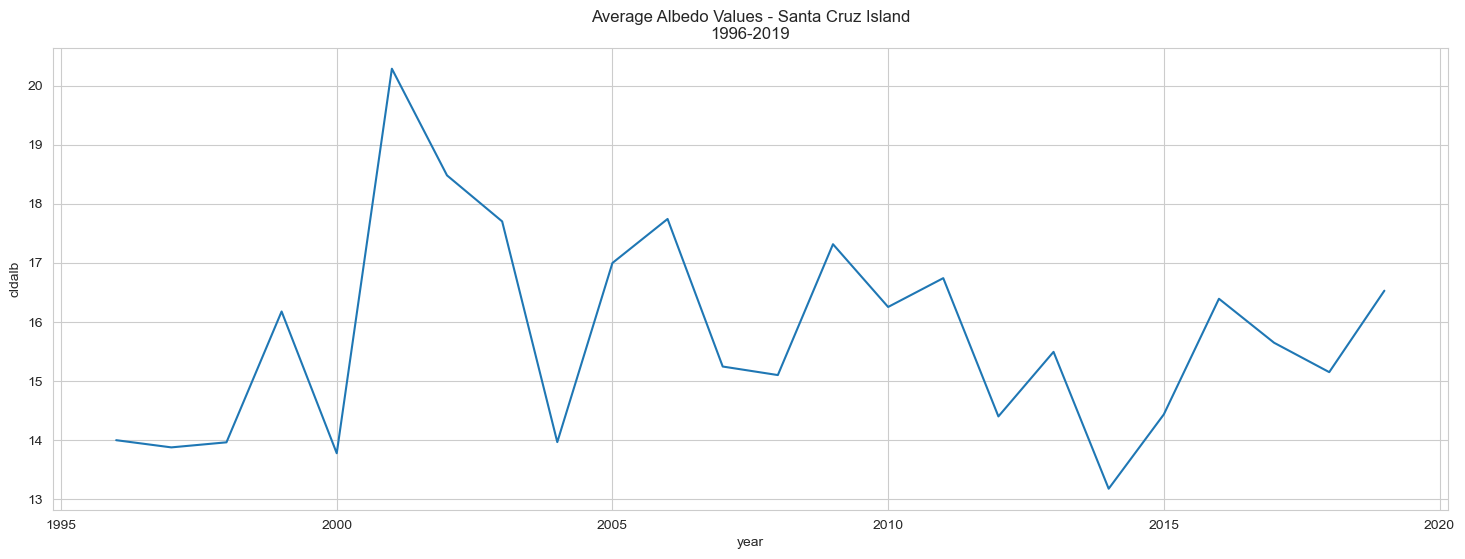

In [ ]:
# Group the Data
da_mean = clc_da.groupby('time.year').mean(dim=['time', 'lat', 'lon'])
df_mean = da_mean.to_dataframe()

# Plot Interannual Trend
fig, ax = plt.subplots(figsize=(18,6))
sns.lineplot(data=df_mean,
             x='year',
             y='cldalb')
ax.set(title='Average Albedo Values - Santa Cruz Island\n1996-2019')
plt.show()